<a href="https://colab.research.google.com/github/pedrora22/DecisionTrees/blob/master/DecisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praticando aprendizagem de máquina

Os pinguins são aves com corpo hidrodinâmico e adaptadas à natação. Esses animais pertencem à ordem Sphenisciformes, e, atualmente, são descritas 18 espécies, distribuídas do continente Antártico até as ilhas Galápagos. As espécies variam muito em tamanho, existindo algumas que atingem mais de 1 metro.

# Dataset

Dataset de pinguins Palmer Archipelago (Antarctica) contendo três diferentes espécies.


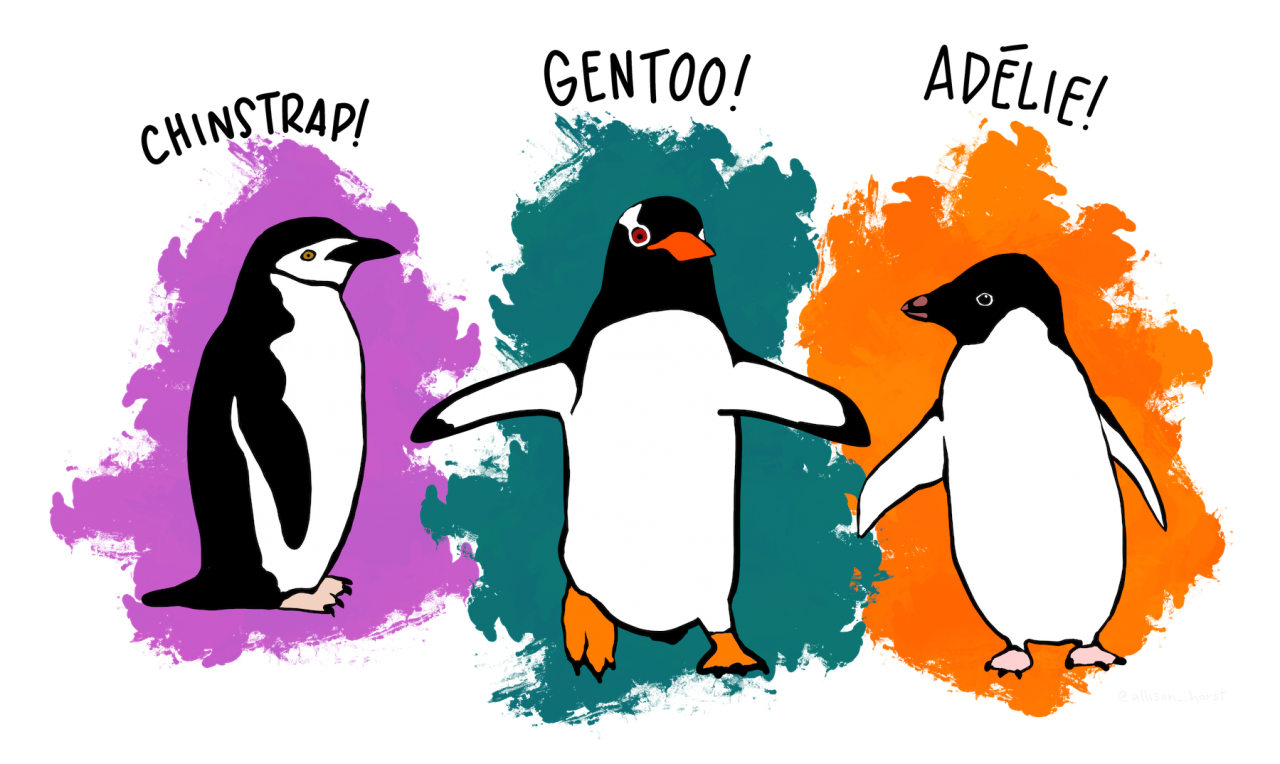

# Carregando dataset e bibliotecas

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('penguim.csv')
df


,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...,...
339,340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


# Colunas do dataset


In [ ]:
df.shape # this is a small dataset

(344, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [ ]:
df.isnull().sum() * 100 / df.shape[0]

,0
rowid,0.000000
species,0.000000
island,0.000000
bill_length_mm,0.581395
bill_depth_mm,0.581395
flipper_length_mm,0.581395
body_mass_g,0.581395
sex,3.197674
year,0.000000


# Observações

Considere "bill_length_mm" and "como equivalente ao cumen

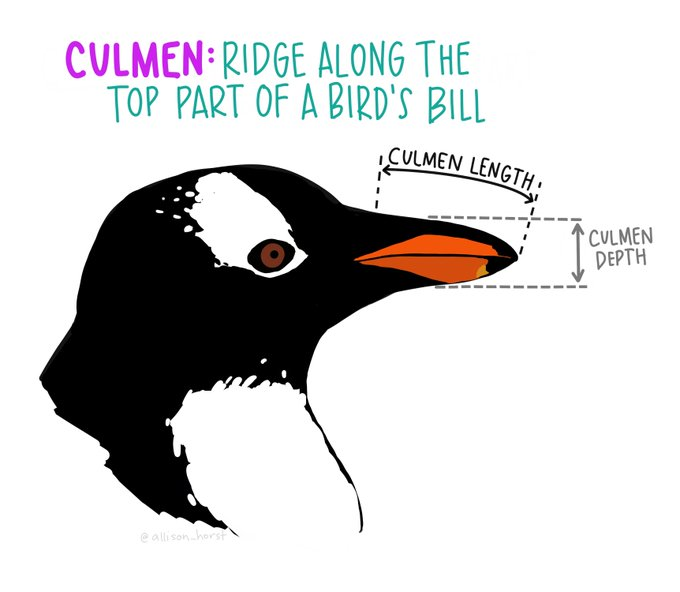

# Exercício 1 - Eliminatório
Identifique o tipo de cada coluna: categórica ou numérica.

In [ ]:
# @title rowid
rowid = "Numérica" # @param ["Categórica", "Numérica"]

In [ ]:
# @title species
species = "Categórica" # @param ["Categórica", "Numérica"]


In [ ]:
# @title island
island = "Categórica" # @param ["Categórica", "Numérica"]

In [ ]:
# @title bill_length_mm
bill_length_mm = "Numérica" # @param ["Categórica", "Numérica"]

In [ ]:
# @title flipper_length
flipper_length_mm = "Numérica" # @param ["Categórica", "Numérica"]

In [ ]:
# @title body_mass_g
body_mass_g = "Numérica" # @param ["Categórica", "Numérica"]

In [ ]:
# @title sex
sex = "Categórica" # @param ["Categórica", "Numérica"]

In [ ]:
# @title year
year = "Numérica" # @param ["Categórica", "Numérica"]

In [ ]:
# Apenas para facilitar visualizar suas respostas
data = {
    'Variable': ['rowid', 'species', 'island', 'bill_length_mm', 'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
    'Value': [rowid, species, island, bill_length_mm, flipper_length_mm, body_mass_g, sex, year]
}
df = pd.DataFrame(data)
df

,Variable,Value
0,rowid,Numérica
1,species,Categórica
2,island,Categórica
3,bill_length_mm,Numérica
4,flipper_length_mm,Numérica
5,body_mass_g,Numérica
6,sex,Categórica
7,year,Numérica


In [ ]:
df

,Variable,Value
0,rowid,Numérica
1,species,Categórica
2,island,Categórica
3,bill_length_mm,Numérica
4,flipper_length_mm,Numérica
5,body_mass_g,Numérica
6,sex,Categórica
7,year,Numérica


# Exercício 2  (Valor 0.1):

Apresente um gráfico mostrando a distribuição **percentual**  dos pinguins por espécie

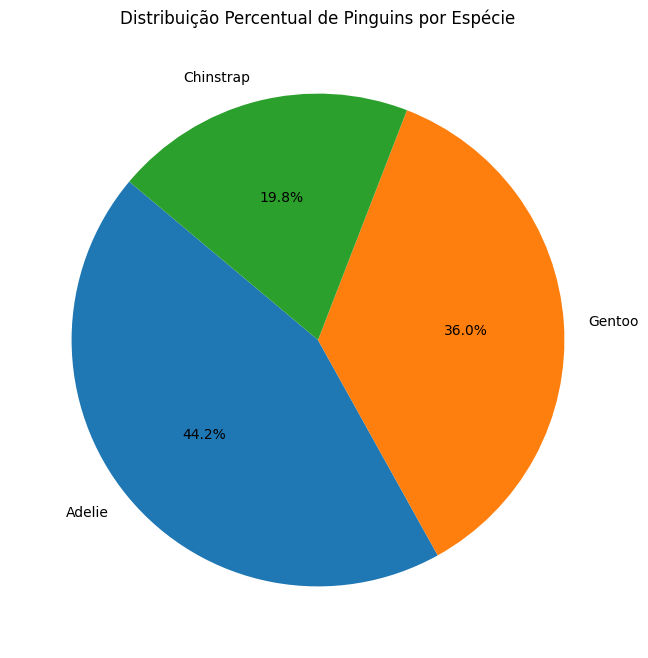

In [ ]:
penguins = pd.read_csv('penguim.csv')
df_penguins = penguins.copy()


# Calculate the percentage distribution of species
species_counts = df_penguins['species'].value_counts()
total_penguins = species_counts.sum()
species_percentages = (species_counts / total_penguins) * 100

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(species_percentages, labels=species_percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição Percentual de Pinguins por Espécie')
plt.show()


# Código da árvore de decisão

# **Exercício Principal**  (Valor 0.4):
- prever a espécie de pinguim.
- Target seria o "species".
- Realizar análise de resultados.

Critérios:
- Evitar overfitting
- Tratar dados corretamente
- Resultados na média
- Análise de resultados apropriada
- Inovação (opcional)

Acurácia: 0.98


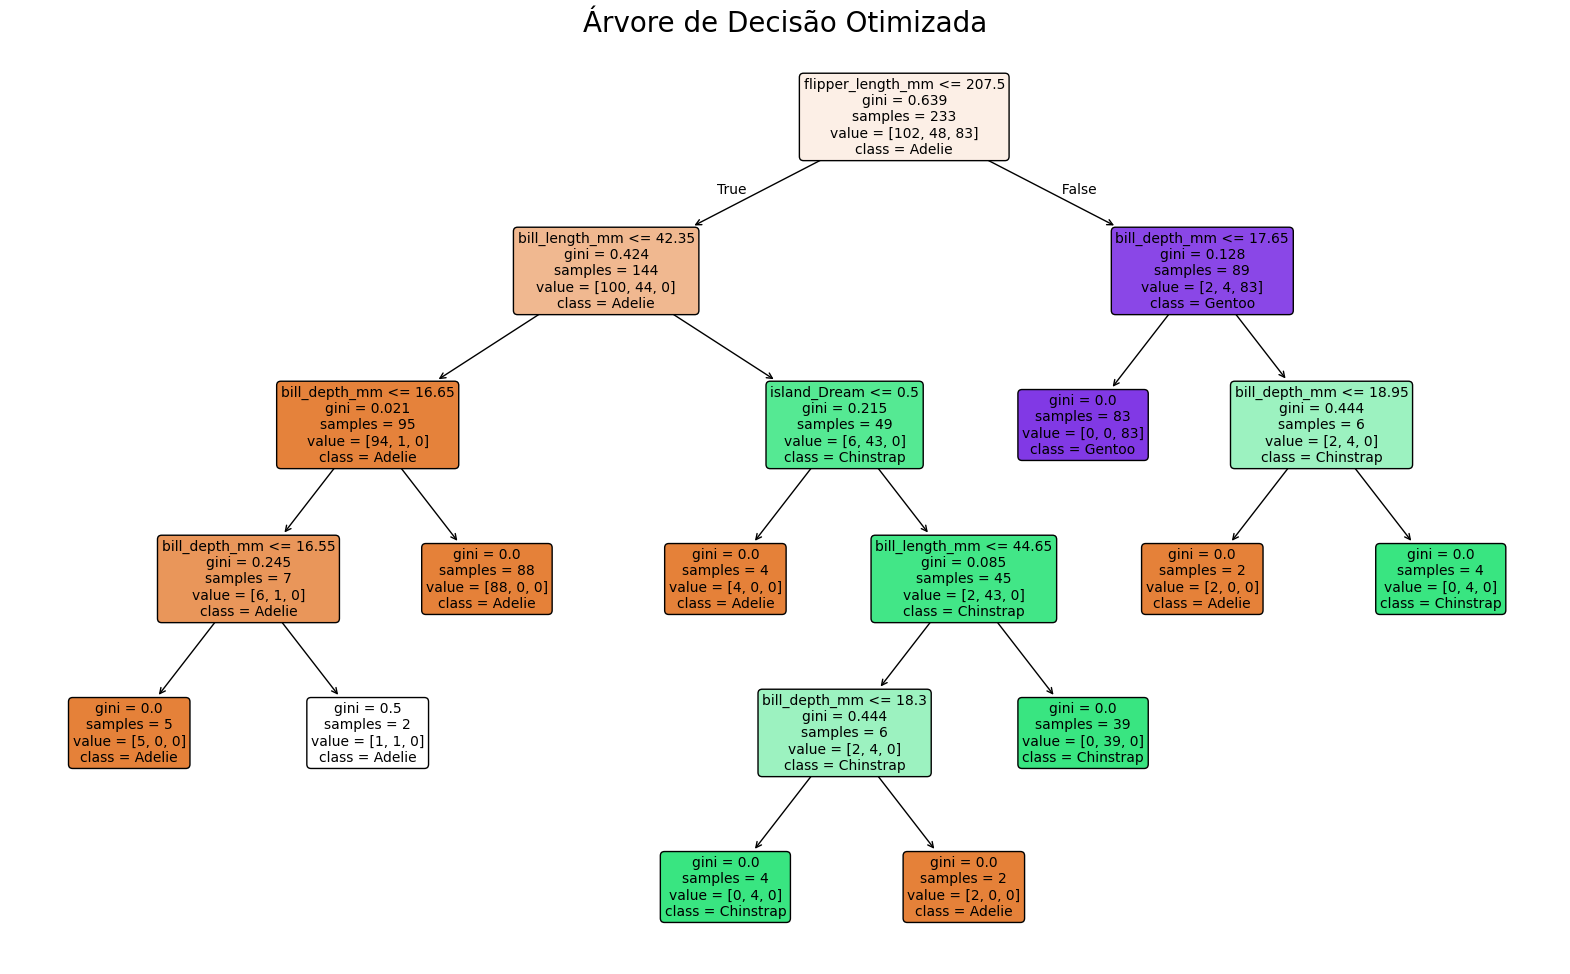

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np

df = pd.read_csv('penguim.csv')

# 1. Como tratar elementos nulos?!
df.dropna(inplace=True)
# 2. Quais colunas devem ser removidas?
df.drop(columns=['rowid'], inplace=True)
df.drop(columns=['year'], inplace=True)
df.drop(columns=['sex'], inplace=True)
# 3. Como tratar colunas categóricas:
#    - pandas: GetDummies
#          -> X_encoded = pd.get_dummies(X)
#    -  sklearn: OneHotEncoder
#          -> Ver aula sobre o tema

X = df.drop('species', axis=1)
y = df['species']

X_encoded = pd.get_dummies(X, columns=['island'], drop_first=True)

# 4. Cuidado para não fazer Label Encoding antes de train_test_split!
# 5. Aplique LabelEncoding em *y* (mas evite contaminação!)
#    Exemplo
#      label_encoder = LabelEncoder()
#      y_train_encoded = label_encoder.fit_transform(y_train)
#      y_test_encoded = label_encoder.transform(y_test)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42, stratify=y)

# 6. Divida os dados em conjuntos de treinamento e teste:
#     - X, y -> X_train, X_test, y_train, y_test
# 7. Crie o modelo de árvore de decisão e ajuste-o aos dados de treinamento
#     - Use pelo menos o hiperparâmetro max_depth, interessante se utilizar outros
#     - https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

from sklearn.model_selection import GridSearchCV


dt = DecisionTreeClassifier(random_state=42)
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'ccp_alpha': [0.0, 0.001, 0.01, 0.05]
}

grid_search = GridSearchCV(dt, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 8. Avalie o modelo nos dados de teste
#    - accuracy_score?
#    - Quais outros?

best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)

# 9. Visualize a árvore de decisão
plt.figure(figsize=(20, 12))
plot_tree(best_dt,
          feature_names=X_encoded.columns,
          class_names=best_dt.classes_,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Árvore de Decisão Otimizada", fontsize=20)
plt.show()



#